# Practical 1.1: Basics of Machine Learning : Diabetes with linear/polynomial regression
In this practical, we will be exploring regression in machine learning.

Specifically, we will be trying to predict the risk of diabietes for a certain person 
given attributes (also known as features) of the person such as:
- age
- sex
- BMI

## Imports

In [2]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.base import clone

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Loading the data
The dataset is builtin within scikit-learn, so we load it with:

In [3]:
diabetes = datasets.load_diabetes()
examples, diabetes_risks = diabetes['data'], diabetes['target']
print(f"{len(examples)} examples in the dataset")

442 examples in the dataset


In [4]:
print(f"examples shape:{examples.shape}")
print(f"no. of examples:{examples.shape[0]}")
print(f"feature per example:{examples.shape[1]}")

examples shape:(442, 10)
no. of examples:442
feature per example:10


The shape tells us that `examples` is a 2-dimensional numpy array.  
This means that you can imagine that `examples` is a table 442 rows (_1st example dimension_) and 10 columns (_2nd feature dimension_).

<div style="text-align:center">
<b>Think of examples is a 442 by 10 table:</b>
</div>

| example | Age | Sex | BMI | ... |
| --- | --- | --- | --- | --- |
| 0 | 16 | M | 34 | ... |
| 1 | 14 | F | 24 | ... |
| 2  | 42 | M | 124 | ... |
| ... | ... | ... | ... | ... |

> Each row represents an example in the dataset, while each column represents a feature.


Basicaly it means that there are 442 individual examples, and that for each of the  
442 examples there are 10 features, which include:
- The features include:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - ....

Correspondingly, the dataset also contains `diabeties_risks`.  
This is the value that we are trying to predict.
Lets take a look at the first ten risks

In [5]:
diabetes_risks[:10]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

In this task, we will try to use the features (such as BMI) and use them  
to predict the diabetes risk using ML model.
The prediction target, `diabetes_risks` is a continuous numeric value.  
This means that this is a **regression** problem.

## Training the model
### Feeding the data into the model
Our intution about health suggets that the higher the persons BMI,  
the more unhealthly he/she is. This might mean that they also have  
a higher risk of diabetes.

First, we need to extract the BMI from the examples.

| example | Age | Sex | BMI | ... |
| --- | --- | --- | --- | --- |
| 0 | 16 | M | 34 | ... |
| 1 | 14 | F | 24 | ... |
| 2  | 42 | M | 124 | ... |
| ... | ... | ... | ... | ... |

Normally, doing this using code that does not take advantage of `numpy` looks like this:
```python
# BMI is the second feature
# List indexing starts from 0
# Hence BMI feature indexing is 1
bmi_idx = 1
bmis = []
for example in examples:
    # example is a list of features
    # which contains the BMI we want
    bmi = example[bmi_idx]
    bmis.append(bmi)
```

With `numpy` all of that can be shortend into:

In [6]:
bmis = examples[:, 2]

### Fitting the model
Once we have extracted a feature, we can train a **model** to try and fit the data.  
For the model, we will use the simplest one: `LinearRegression` is a single, straght line model.  
Training the model incrediblely easy with `scikit-learn` models,  
just call `.fit()` on the model.

In [7]:
model = LinearRegression()
bmis = bmis.reshape((442, 1))
model.fit(bmis, diabetes_risks)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

> `.reshape(442, 1)` reshapes the 442 elements to 442 rows & 1 column  
> This is because Scikit-learn expects data in the 'shape' [example, feature],  
> a 2D array instead of a 1D array.  

### Predicting using the model
Once we have trained the model, we can obtain predictions from the model using `.predict()`:

In [8]:
try_bmis = bmis[:3]
print(f"bmi input:{try_bmis}")
try_risks = model.predict(try_bmis)
print(f"diabeties output:{try_risks}")

bmi input:[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]]
diabeties output:[210.71003806 103.26219543 194.33703347]


## Evaluating the Model
We can train our model, but we do not how it performs on unseen data.\


### Cross Validation dataset split
Actually we forgot to do something before training the model:  
we have to split the dataset into **train** and **validate** sets:
- we train on the training set
- we _cross validate_ or check the models performance on unseen data on the validation set.

Using the `Scikit-Learn`'s built in `train_test_split()` function,  
we can do this easily. We prefix `train_` or `valid_` to help us determine  
whether they belong to the _training_ of _validation_ sets respectively:

In [9]:
train_bmis, valid_bmis, train_risks, valid_risks = train_test_split(
    bmis, diabetes_risks, 
    test_size=0.3, 
    shuffle=True,
    random_state=0)

> `train_test_split` returns 4 values, so we have 4 variables to store each of these values.  
> `test_size=0.3` - sets 30% of the data as test set and the remainding 70% as train set.  
> `shuffle=True` - tells it to shuffle the data before splitting

We can now proceed to train the model as usual:

In [10]:
model = LinearRegression()
model.fit(train_bmis, train_risks)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Evaluting with Metrics
**Metrics** help you evaluate how we your model is doing by providing a numeric  
judgement of your models performance. The loss function is a example of a metric:  
the lower the value, the better the model

> We prefix the metric with the name of the set of data that the model for example  
> the loss function evaluate on the validation set is called the **validation loss**

In [11]:
# training loss
pred_risks = model.predict(train_bmis)
train_mse = mean_squared_error(train_risks, pred_risks)
print(f'training mean squared error: {train_mse}')

# validation loss
pred_risks = model.predict(valid_bmis)
valid_mse = mean_squared_error(valid_risks, pred_risks)
print(f'validation mean squared error: {valid_mse}')

training mean squared error: 3892.7208150824304
validation mean squared error: 3921.3720274248517


However, loss values are not very interpretable (ie is `3563.17..` a good value or bad value?).  
This calls more interpretable metrics like the **$r^2$ score**, which in simple terms  
measures how well your model fits the variation of the data.

$r^2$  _normally_ ranges from 0.0 to 1.0, with a higher score meaning  
that the model is better at fitting the data.
>$r^2$ may become negative if your model is especially terrible at fitting the data

In [12]:
# training r2
pred_risks = model.predict(train_bmis)
train_r2 = r2_score(train_risks, pred_risks)
print(f'training r2: {train_r2}')

# validation r2
pred_risks = model.predict(valid_bmis)
valid_r2 = r2_score(valid_risks, pred_risks)
print(f'validation r2: {valid_r2}')

training r2: 0.3807751933514646
validation r2: 0.23132831307953805


### Evaluating with Visualisation
Another way we can evaluate the model is plot it out with the data to see well the model fits the data.  
This evaluation method is only suitable for simple models, such as the `LinearRegression` model we  
are currently using.

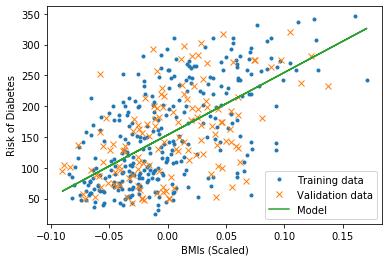

In [13]:
pred_risks = model.predict(bmis)
plt.plot(train_bmis, train_risks, '.', label='Training data')
plt.plot(valid_bmis, valid_risks, 'x', label='Validation data')
plt.plot(bmis, pred_risks, '-', label='Model')

plt.xlabel('BMIs (Scaled)')
plt.ylabel('Risk of Diabetes')

plt.legend()

#### Evaluating with Learning Curves
One final but instrumental way to evaluate your model is by learning curve.  
A learning curve is basically a plot of training and validation metrics as the amount   of training increases.
> we can control the amount of training the model recieves by limiting the 
> amount of training data that the model can train on.

We plot the learning as follows:

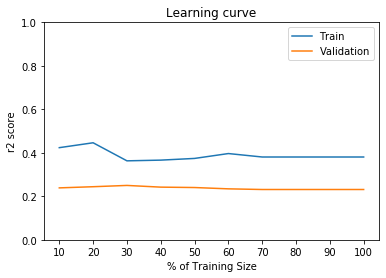

In [14]:
def plot_learning_curve(orig_model, train_ins, train_outs, valid_ins, valid_outs):
    # save the scores for plotting the learning curve laterff
    train_scores = []
    valid_scores = []

    for i in np.arange(0.1, 1.1, 0.1):
        train_size = int(442 * i)
        X_train = train_ins[:train_size]
        X_valid = valid_ins
        y_train = train_outs[:train_size]
        y_valid = valid_outs

        model = clone(orig_model)
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_valid_pred = model.predict(X_valid)

        train_r2 = r2_score(y_train, y_train_pred)
        valid_r2 = r2_score(y_valid, y_valid_pred)

        train_scores.append(train_r2)
        valid_scores.append(valid_r2)

    plt.plot(train_scores)
    plt.plot(valid_scores)
    
    plt.title("Learning curve")
    plt.ylabel('r2 score')
    plt.xlabel('% of Training Size')
    plt.xticks(range(10), (np.arange(0.1, 1.1, 0.1) * 100).astype(int))
    plt.ylim(0.0, 1.0) # limit r2 score axis to 0.0 to 1
    plt.legend(['Train', 'Validation'])


plot_learning_curve(LinearRegression(), 
                    train_bmis, train_risks, 
                    valid_bmis, valid_risks)

From the learning curve, we can infer that the model is **underfitting** as both the   
training and validation $r^2$ scores are low. We learn from the lecture that ways
to combat underfitting include:
- using a more powerful model
- using more or create better features to feed into your modle

## Iterate. Iterate. Iterate.
So far, we have only trained the model on one feature: BMI.
Since, the model is underfitting, we can try to fit the model with all the features in the dataset.  
We will also use another, more powerful model: the SVM, to combat underfitting.

In [99]:
# split train validation sets
train_examples, valid_examples, train_risks, valid_risks = train_test_split(
    examples, diabetes_risks, 
    test_size=0.3, 
    shuffle=True,
    random_state=0)

# train the model us usual
model = SVR(C=9e+2, kernel='rbf', gamma=1e-1)
model.fit(train_examples, train_risks)

SVR(C=900.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Evaluate with Metrics
We evaluate the model with $r^2$ score metric.

In [104]:
# training loss
pred_risks = model.predict(train_examples)
train_r2 = r2_score(train_risks, pred_risks)
print(f'training r2 score: {train_r2}')

# validation loss
pred_risks = model.predict(valid_examples)
valid_r2 = r2_score(valid_risks, pred_risks)
print(f'validation r2 score : {valid_r2}')

training r2 score: 0.5351589949035742
validation r2 score : 0.413448808993364


In [106]:
model.get_params()

{'C': 900.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 0.1,
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### Evaluate with Learning Curve
We evaluate our model with a learning curve

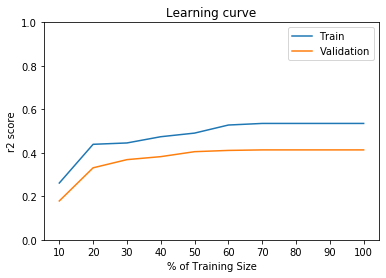

In [206]:
plot_learning_curve(SVR(C=9e+2, kernel='rbf', gamma=1e-1),
                    train_examples, train_risks,
                    valid_examples, valid_risks)